# Data Manipulation Task 1

In [2]:
import requests

from bs4 import BeautifulSoup
import pandas as pd


def getData(year, NameCsv):
    
    url = f'https://www.basketball-reference.com/leagues/NBA_20{year}.html'
    req = requests.get(url)
    

    soup = BeautifulSoup(req.text, "html.parser")

    
    table1 = soup.find("table", id="per_game-team")
    table2 = soup.find("table", id="advanced-team")
    table3 = soup.find("table", id="shooting-team")
    dfpergame = pd.read_html(str(table1))[0]
    #dfpergame.drop("Rk",axis=1, inplace=True)
    #dfpergame.to_csv("pergame.csv")
    dfadvanced = pd.read_html(str(table2))[0]
    dfshooting = pd.read_html(str(table3))[0]
    #dfshooting.head(30)
    #dfshooting.head(10)
    #dfadvanced.drop("Rk",axis=1, inplace=True)
    #print(dfadvanced.columns)
    newCols = []
    for i in dfadvanced.columns:
        if i[0] =="Offense Four Factors":
            newCols.append(i[1]+"O")
        elif i[0] =="Defense Four Factors":
            newCols.append(i[1]+"D")
        else:
            newCols.append(i[1])
    dfadvanced.columns = newCols
    dfpergame = dfpergame.drop(columns=["Rk"])
    dfadvanced = dfadvanced.drop(columns=['Unnamed: 17_level_1','Unnamed: 22_level_1','Unnamed: 27_level_1',"Rk"])
    newColsSht = []
    for j in dfshooting.columns:
        if j[0] =="% of FGA by Distance":
            newColsSht.append(j[1]+"A")
        elif j[0] =="FG% by Distance":
            newColsSht.append(j[1]+"%")
        elif j[0] =="% of FG Ast'd":
            newColsSht.append(j[1]+"as")
        elif j[0] =="Corner": 
            newColsSht.append(j[1]+"C")   
        else:
            newColsSht.append(j[1])
    
    dfshooting.columns = newColsSht
    #print(dfshooting.columns)
    dfshooting = dfshooting.drop(columns=["Rk",'Unnamed: 6_level_1','Unnamed: 13_level_1','Unnamed: 20_level_1',"Rk",'Unnamed: 23_level_1','Unnamed: 26_level_1','Unnamed: 29_level_1','Unnamed: 32_level_1'])
    # dfadvanced.to_csv(NameCsv+"adv.csv",index=False)
    # dfpergame.to_csv(NameCsv+".csv",index=False)
    dfmerged = pd.merge(dfpergame,dfadvanced, on="Team",how="outer")
    
    x = dfmerged.iloc[12]  
    dfmerged = dfmerged.drop(index=12)     
    dfmerged = pd.concat([dfmerged, x.to_frame().T], ignore_index=True)
    

    

    def isPlayoff(value):
        if "*" in value:
            return 1
        else:
            return 0
    def nameChange(value):
        if "*" in value:
            value = value[:-1]
            return value+f'{year}'
        elif "League Average" in value:
            return value+f'{year}'
        else:
            return value+f'{year}'
    dfmerged["Playoffs"] = dfmerged["Team"].apply(isPlayoff)
    dfmerged["Team"] = dfmerged["Team"].apply(nameChange)
    dfshooting["Team"] = dfshooting["Team"].apply(nameChange)
    #dfmerged.to_csv(NameCsv, index=False)
    #dfshooting.to_csv("sht"+NameCsv,index=False)
    return (dfmerged,dfshooting)
   
#getData('2025','2025_data.csv')

In [3]:
import numpy as np

In [4]:
years = ["02","03","04","05","06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24"]
shtdfs =[]
perGamedfs = []
for i in years:
    x = getData(i,'')
    perGamedfs.append(x[0])
    shtdfs.append(x[1])


PG_df = pd.concat(perGamedfs, ignore_index=True)
sht_df = pd.concat(shtdfs, ignore_index=True)





C:\Users\scwvi\AppData\Local\Temp\ipykernel_22588\1020829040.py:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfpergame = pd.read_html(str(table1))[0]
C:\Users\scwvi\AppData\Local\Temp\ipykernel_22588\1020829040.py:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfadvanced = pd.read_html(str(table2))[0]
C:\Users\scwvi\AppData\Local\Temp\ipykernel_22588\1020829040.py:23: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfshooting = pd.read_html(str(table3))[0]
C:\Users\scwvi\AppData\Local\Temp\ipykernel_22588\1020829040.py:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a 

Fixing all name changes to be current NBA Name

In [5]:

def thunder(value):
    if "Sonics" in value:
        value = 'Oklahoma City Thunder'+value[-2:]    
    return value
def nets(value):
    if "New Jersey" in value:
        value = 'Brooklyn Nets'+value[-2:]    
    return value
def Pelicans(value):
    if "New Orleans" in value:
        value = 'New Orleans Pelicans'+value[-2:]    
    return value
def Hornets02(value):
    if "Charlotte Hornets02" in value:
        value = 'New Orleans Pelicans02'    
    return value
def Hornets(value):
    if "Bobcat" in value:
        value = 'Charlotte Hornets'+value[-2:]    
    return value


PG_df["Team"] = PG_df["Team"].apply(thunder)
PG_df["Team"] = PG_df["Team"].apply(nets)
PG_df["Team"] = PG_df["Team"].apply(Pelicans)
PG_df["Team"] = PG_df["Team"].apply(Hornets02)
PG_df["Team"] = PG_df["Team"].apply(Hornets)

sht_df["Team"] =sht_df["Team"].apply(thunder)
sht_df["Team"] = sht_df["Team"].apply(nets)
sht_df["Team"] = sht_df["Team"].apply(Pelicans)
sht_df["Team"] = sht_df["Team"].apply(Hornets02)
sht_df["Team"] = sht_df["Team"].apply(Hornets)
#x = PG_df[PG_df['Team'].str.contains('horn', case=False, na=False)]

    
#x

# Analyzing scoring types over last 10 years Task 2

In [6]:
#PG_df.head(10))
#sht_df.head(10)

shooting_df = sht_df[["Team","2PA","0-3A","3-10A","10-16A","16-3PA","3PA","2P%","0-3%","3-10%","10-16%","16-3P%","3P%"]]
shooting_df["PPG"] = PG_df["PTS"]
shooting_df["ORtg"] = PG_df["ORtg"]
shooting_df["Wins"] = PG_df["W"]
shooting_df["Playoffs"] = PG_df["Playoffs"]
shooting_df["Total3PA"] = PG_df["3PA"]
def getYear(value):
    return value[-2:]
shooting_df["Year"] = shooting_df["Team"].apply(getYear)





shooting_df["Layups"] = shooting_df["0-3A"]+ shooting_df["3-10A"]
shooting_df["Midrange"] = shooting_df["10-16A"]+ shooting_df["16-3PA"]

shooting_df["Layups%"] = (
    (shooting_df["0-3%"] * shooting_df["0-3A"]) +
    (shooting_df["3-10%"] * shooting_df["3-10A"])
) / (
    shooting_df["0-3A"] + shooting_df["3-10A"])

shooting_df["Midrange%"] = (
    (shooting_df["10-16%"] * shooting_df["10-16A"]) +
    (shooting_df["16-3P%"] * shooting_df["16-3PA"])
) / (shooting_df["10-16A"] + shooting_df["16-3PA"])





leagueAveragesScoringTypes_df = shooting_df[shooting_df['Team'].str.contains('League', case=False, na=False)]
recent_df = shooting_df[shooting_df['Year'].astype(int) >= 18]
recentAverages_df = shooting_df[shooting_df['Team'].str.contains('League', case=False, na=False)]

#leagueAveragesScoringTypes_df.head(25)



C:\Users\scwvi\AppData\Local\Temp\ipykernel_22588\3274212872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shooting_df["PPG"] = PG_df["PTS"]
C:\Users\scwvi\AppData\Local\Temp\ipykernel_22588\3274212872.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shooting_df["ORtg"] = PG_df["ORtg"]
C:\Users\scwvi\AppData\Local\Temp\ipykernel_22588\3274212872.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



Percentage of Shots attempts by distance

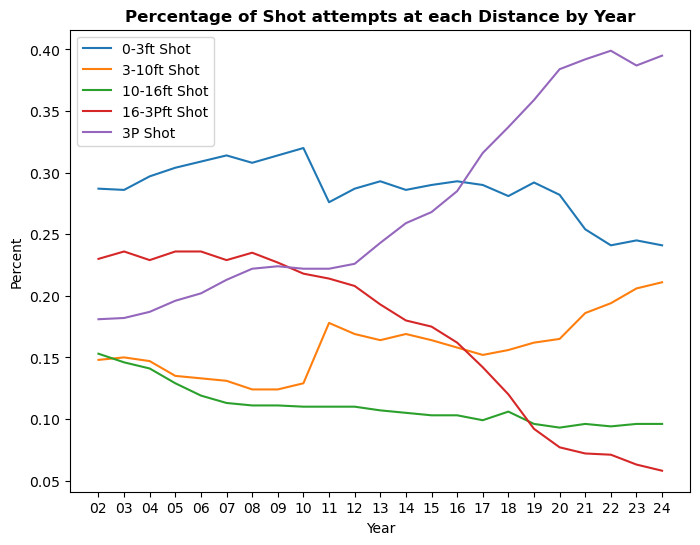

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt




plt.figure(figsize=(8, 6))

for i in "0-3A","3-10A","10-16A","16-3PA":
    plt.plot(leagueAveragesScoringTypes_df['Year'], leagueAveragesScoringTypes_df[i], label=i[:-1]+"ft Shot")

plt.plot(leagueAveragesScoringTypes_df['Year'], leagueAveragesScoringTypes_df['3PA'], label='3P Shot')



plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Percentage of Shot attempts at each Distance by Year',fontweight='bold')
plt.legend()


plt.show()



Percentage of Shots attempts by distance grouped into specific categories 

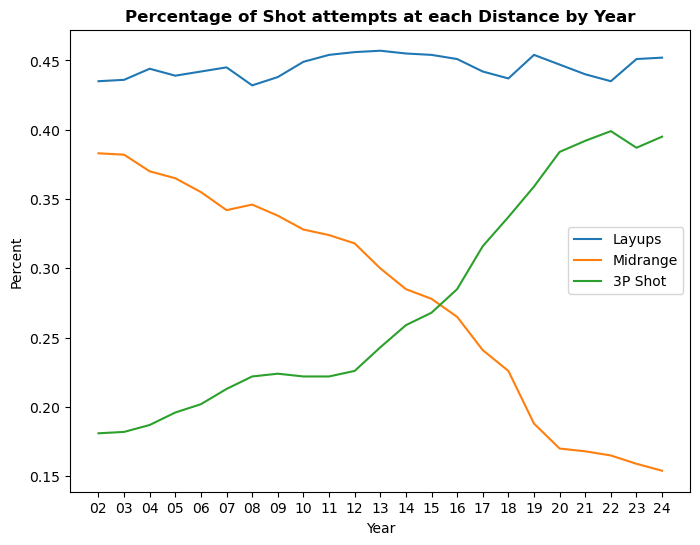

In [8]:




plt.figure(figsize=(8, 6))

plt.plot(leagueAveragesScoringTypes_df['Year'], leagueAveragesScoringTypes_df['Layups'], label='Layups')
plt.plot(leagueAveragesScoringTypes_df['Year'], leagueAveragesScoringTypes_df['Midrange'], label='Midrange')
plt.plot(leagueAveragesScoringTypes_df['Year'], leagueAveragesScoringTypes_df['3PA'], label='3P Shot')


plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Percentage of Shot attempts at each Distance by Year',fontweight='bold')
plt.legend()


plt.show()


Make percentage of shots based on shot distance

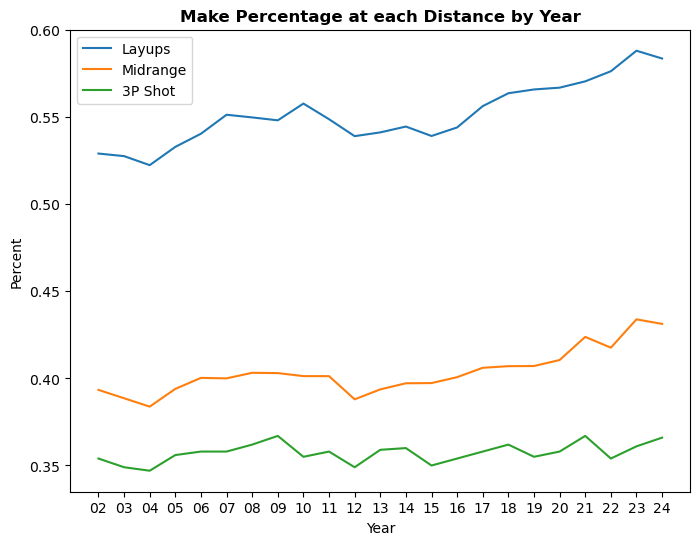

In [9]:
plt.figure(figsize=(8, 6))

plt.plot(leagueAveragesScoringTypes_df['Year'], leagueAveragesScoringTypes_df['Layups%'], label='Layups')
plt.plot(leagueAveragesScoringTypes_df['Year'], leagueAveragesScoringTypes_df['Midrange%'], label='Midrange')
plt.plot(leagueAveragesScoringTypes_df['Year'], leagueAveragesScoringTypes_df['3P%'], label='3P Shot')
#plt.plot(leagueAveragesScoringTypes_df['Year'],leagueAveragesScoringTypes_df["PPG"],label="Points Per Game")

plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Make Percentage at each Distance by Year',fontweight='bold')
plt.legend()


plt.show()

Top 5 Teams on attempt percentage, 

C:\Users\scwvi\AppData\Local\Temp\ipykernel_22588\2596611896.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top53P = shooting_df.groupby('Year').apply(lambda x: x.nlargest(5, '3PA')).reset_index(drop=True)
C:\Users\scwvi\AppData\Local\Temp\ipykernel_22588\2596611896.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5Mid = shooting_df.groupby('Year').apply(lambda x: x.nlargest(5, 'Midrange')).reset

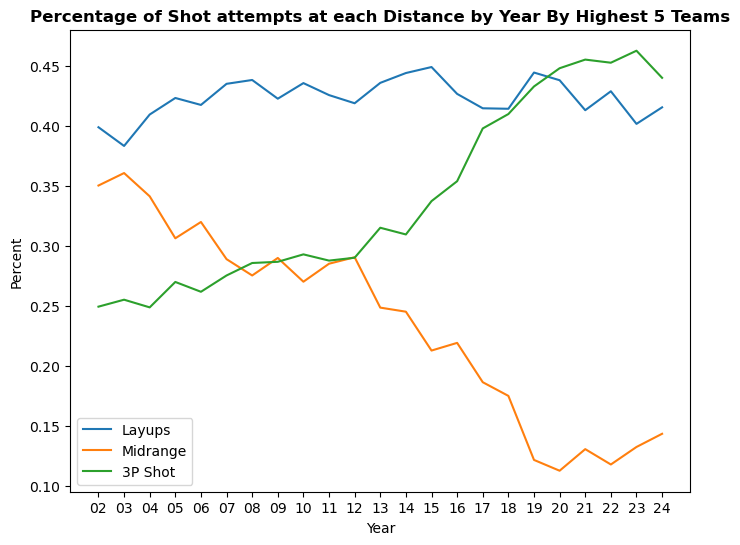

In [10]:
top53P = shooting_df.groupby('Year').apply(lambda x: x.nlargest(5, '3PA')).reset_index(drop=True)
top5Mid = shooting_df.groupby('Year').apply(lambda x: x.nlargest(5, 'Midrange')).reset_index(drop=True)
top5Lay = shooting_df.groupby('Year').apply(lambda x: x.nlargest(5, 'Layups')).reset_index(drop=True)

#print(top5Lay.head(10))
averages3P_df = top53P.groupby('Year')['3PA'].mean().reset_index()
averagesMid_df = top53P.groupby('Year')['Midrange'].mean().reset_index()
averagesLay_df = top53P.groupby('Year')['Layups'].mean().reset_index()

plt.figure(figsize=(8, 6))

plt.plot(averagesLay_df['Year'], averagesLay_df['Layups'], label='Layups')
plt.plot(averagesMid_df['Year'], averagesMid_df['Midrange'], label='Midrange')
plt.plot(averages3P_df['Year'], averages3P_df['3PA'], label='3P Shot')


plt.xlabel('Year')
plt.ylabel('Percent')
plt.title('Percentage of Shot attempts at each Distance by Year By Highest 5 Teams',fontweight='bold')
plt.legend()


plt.show()


In [11]:
avg2002_df = leagueAveragesScoringTypes_df[leagueAveragesScoringTypes_df['Team'].str.contains('02', case=False, na=False)]
avg2024_df = leagueAveragesScoringTypes_df[leagueAveragesScoringTypes_df['Team'].str.contains('24', case=False, na=False)]
avg2002_df.reset_index(inplace=True)
avg2024_df.reset_index(inplace=True)
x1 = avg2002_df.loc[0, '3PA']
x2 = avg2002_df.loc[0, 'Midrange']
x3 = avg2002_df.loc[0, 'Layups']
y1 = avg2024_df.loc[0, '3PA']
y2 = avg2024_df.loc[0, 'Midrange']
y3 = avg2024_df.loc[0, 'Layups']

print(f'2002 Attempt percentages: \nLayups: {round(x3,5)}\nMidrange: {x2}\n3P: {x1}\n')
print(f'2024 Attempt percentages: \nLayups: {round(y3,5)}\nMidrange: {y2}\n3P: {y1}\n')

z1 = avg2002_df.loc[0, '3P%']
z2 = avg2002_df.loc[0, 'Midrange%']
z3 = avg2002_df.loc[0, 'Layups%']
q1 = avg2024_df.loc[0, '3P%']
q2 = avg2024_df.loc[0, 'Midrange%']
q3 = avg2024_df.loc[0, 'Layups%']

print(f'2002 Make percentages: \nLayups: {round(z3,3)}\nMidrange: {round(z2,3)}\n3P: {z1}\n')
print(f'2024 Make percentages: \nLayups: {round(q3,3)}\nMidrange: {round(q2,3)}\n3P: {q1}')
#avg2002_df

2002 Attempt percentages: 
Layups: 0.435
Midrange: 0.383
3P: 0.181

2024 Attempt percentages: 
Layups: 0.452
Midrange: 0.154
3P: 0.395

2002 Make percentages: 
Layups: 0.529
Midrange: 0.393
3P: 0.354

2024 Make percentages: 
Layups: 0.584
Midrange: 0.431
3P: 0.366


# Team by Team comparisons Task 3

In [12]:
numeric_cols = shooting_df.select_dtypes(include=['number']).columns 
def teamComp(value):
    return value[:-2]
team_averages_df = shooting_df.copy()
Recent_df = shooting_df[shooting_df['Year'].astype(int) >= 15]
RecentTeam_averages_df = Recent_df
#team_averages_df.head()
team_averages_df["Team"] = team_averages_df['Team'].apply(teamComp)
team_averages_df = team_averages_df.groupby('Team')[numeric_cols].mean().reset_index()
RecentTeam_averages_df["Team"] = RecentTeam_averages_df['Team'].apply(teamComp)
RecentTeam_averages_df = RecentTeam_averages_df.groupby('Team')[numeric_cols].mean().reset_index()


C:\Users\scwvi\AppData\Local\Temp\ipykernel_22588\271129733.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RecentTeam_averages_df["Team"] = RecentTeam_averages_df['Team'].apply(teamComp)


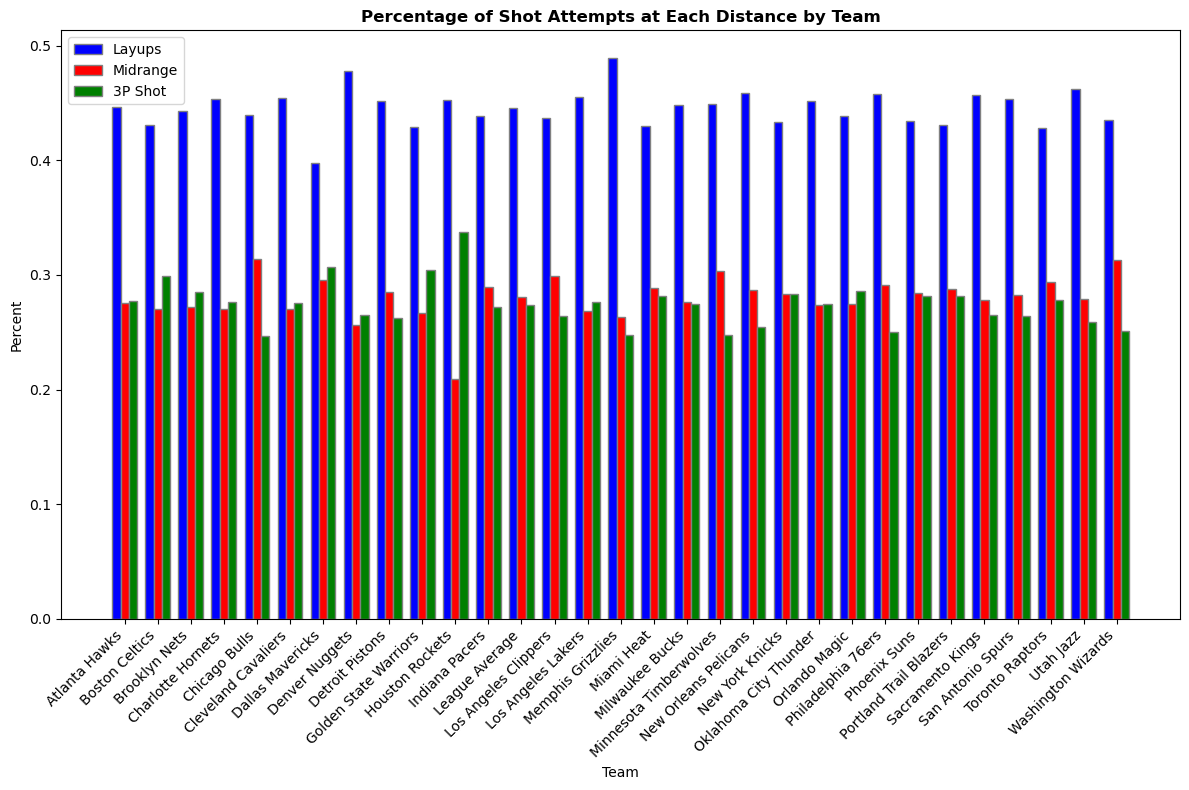

Attempts
Layups 
Highest Percentage: 0.4888695652173913
Lowest Percentage: 0.3976086956521739

Midrange 
Highest Percentage: 0.3138695652173913
Lowest Percentage: 0.20943478260869566

3P 
Highest Percentage: 0.33760869565217394
Lowest Percentage: 0.2466086956521739


In [13]:
plt.figure(figsize=(12, 8))


bar_width = 0.25


r1 = np.arange(len(team_averages_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


plt.bar(r1, team_averages_df['Layups'], color='b', width=bar_width, edgecolor='grey', label='Layups')
plt.bar(r2, team_averages_df['Midrange'], color='r', width=bar_width, edgecolor='grey', label='Midrange')
plt.bar(r3, team_averages_df['3PA'], color='g', width=bar_width, edgecolor='grey', label='3P Shot')


plt.xlabel('Team')
plt.ylabel('Percent')
plt.title('Percentage of Shot Attempts at Each Distance by Team', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(team_averages_df))], team_averages_df['Team'], rotation=45, ha='right')


plt.legend()


plt.tight_layout()
plt.show()
#team_averages_df.head(10)
print("Attempts")
print(f'Layups \nHighest Percentage: {team_averages_df['Layups'].max()}\nLowest Percentage: {team_averages_df['Layups'].min()}\n')
print(f'Midrange \nHighest Percentage: {team_averages_df['Midrange'].max()}\nLowest Percentage: {team_averages_df['Midrange'].min()}\n')
print(f'3P \nHighest Percentage: {team_averages_df['3PA'].max()}\nLowest Percentage: {team_averages_df['3PA'].min()}')



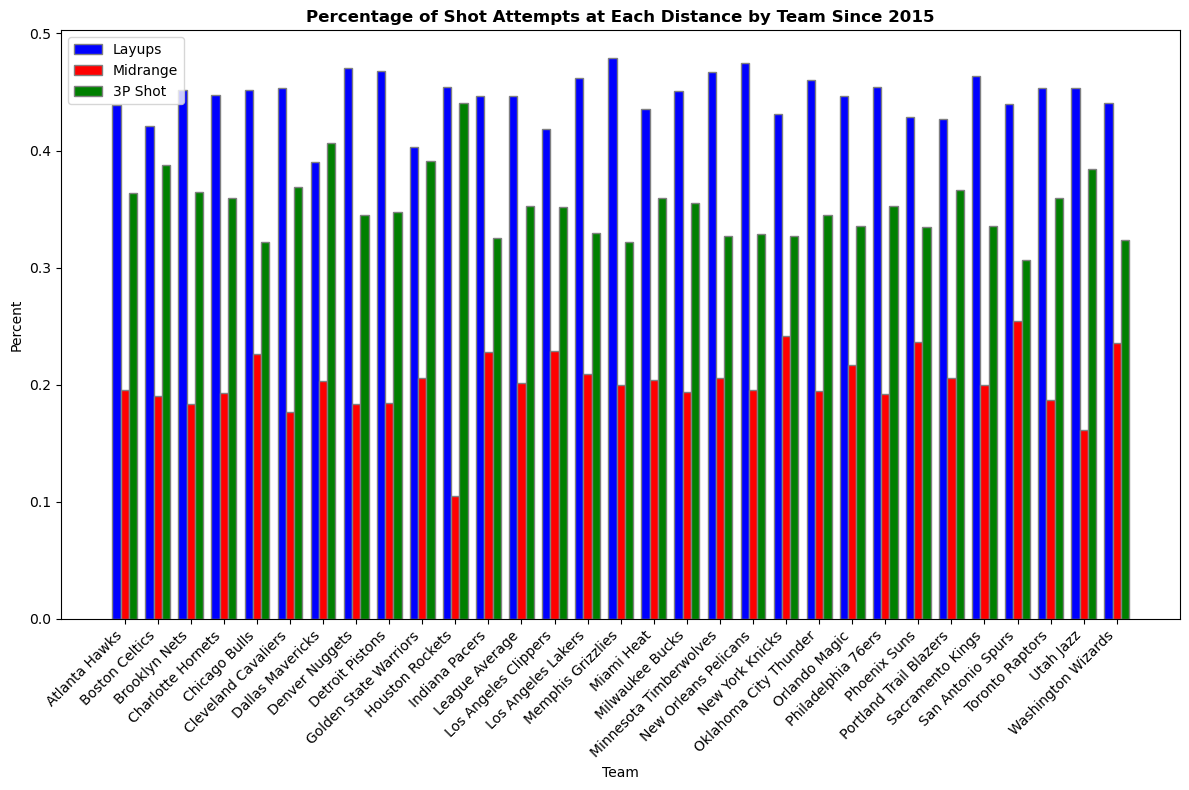

Attempts
Layups 
Highest Percentage: 0.4787
Lowest Percentage: 0.39039999999999997

Midrange 
Highest Percentage: 0.254
Lowest Percentage: 0.10500000000000001

3P 
Highest Percentage: 0.44089999999999996
Lowest Percentage: 0.30670000000000003


In [14]:
plt.figure(figsize=(12, 8))


bar_width = 0.25


r1 = np.arange(len(team_averages_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


plt.bar(r1, RecentTeam_averages_df['Layups'], color='b', width=bar_width, edgecolor='grey', label='Layups')
plt.bar(r2, RecentTeam_averages_df['Midrange'], color='r', width=bar_width, edgecolor='grey', label='Midrange')
plt.bar(r3, RecentTeam_averages_df['3PA'], color='g', width=bar_width, edgecolor='grey', label='3P Shot')


plt.xlabel('Team')
plt.ylabel('Percent')
plt.title('Percentage of Shot Attempts at Each Distance by Team Since 2015', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(RecentTeam_averages_df))], RecentTeam_averages_df['Team'], rotation=45, ha='right')


plt.legend()


plt.tight_layout()
plt.show()
#team_averages_df.head(10)
print("Attempts")
print(f'Layups \nHighest Percentage: {RecentTeam_averages_df['Layups'].max()}\nLowest Percentage: {RecentTeam_averages_df['Layups'].min()}\n')
print(f'Midrange \nHighest Percentage: {RecentTeam_averages_df['Midrange'].max()}\nLowest Percentage: {RecentTeam_averages_df['Midrange'].min()}\n')
print(f'3P \nHighest Percentage: {RecentTeam_averages_df['3PA'].max()}\nLowest Percentage: {RecentTeam_averages_df['3PA'].min()}')



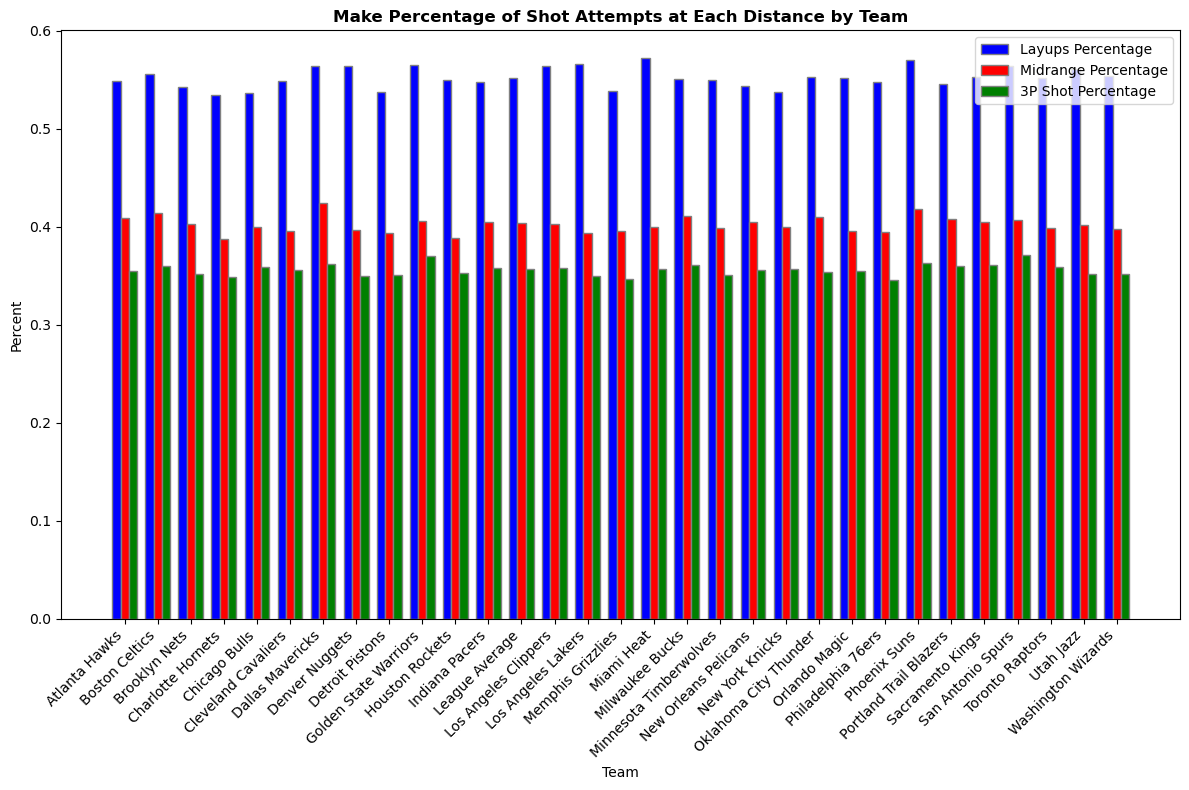

Make Percentage
Layups 
Highest Percentage: 0.571689493538517
Lowest Percentage: 0.5343414997807296

Midrange 
Highest Percentage: 0.42462348177613746
Lowest Percentage: 0.3877968166968936

3P 
Highest Percentage: 0.37069565217391304
Lowest Percentage: 0.34604347826086956


In [15]:
plt.figure(figsize=(12, 8))


bar_width = 0.25


r1 = np.arange(len(team_averages_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


plt.bar(r1, team_averages_df['Layups%'], color='b', width=bar_width, edgecolor='grey', label='Layups Percentage')
plt.bar(r2, team_averages_df['Midrange%'], color='r', width=bar_width, edgecolor='grey', label='Midrange Percentage')
plt.bar(r3, team_averages_df['3P%'], color='g', width=bar_width, edgecolor='grey', label='3P Shot Percentage')


plt.xlabel('Team')
plt.ylabel('Percent')
plt.title('Make Percentage of Shot Attempts at Each Distance by Team', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(team_averages_df))], team_averages_df['Team'], rotation=45, ha='right')


plt.legend()


plt.tight_layout()
plt.show()
print("Make Percentage")
print(f'Layups \nHighest Percentage: {team_averages_df['Layups%'].max()}\nLowest Percentage: {team_averages_df['Layups%'].min()}\n')
print(f'Midrange \nHighest Percentage: {team_averages_df['Midrange%'].max()}\nLowest Percentage: {team_averages_df['Midrange%'].min()}\n')
print(f'3P \nHighest Percentage: {team_averages_df['3P%'].max()}\nLowest Percentage: {team_averages_df['3P%'].min()}')


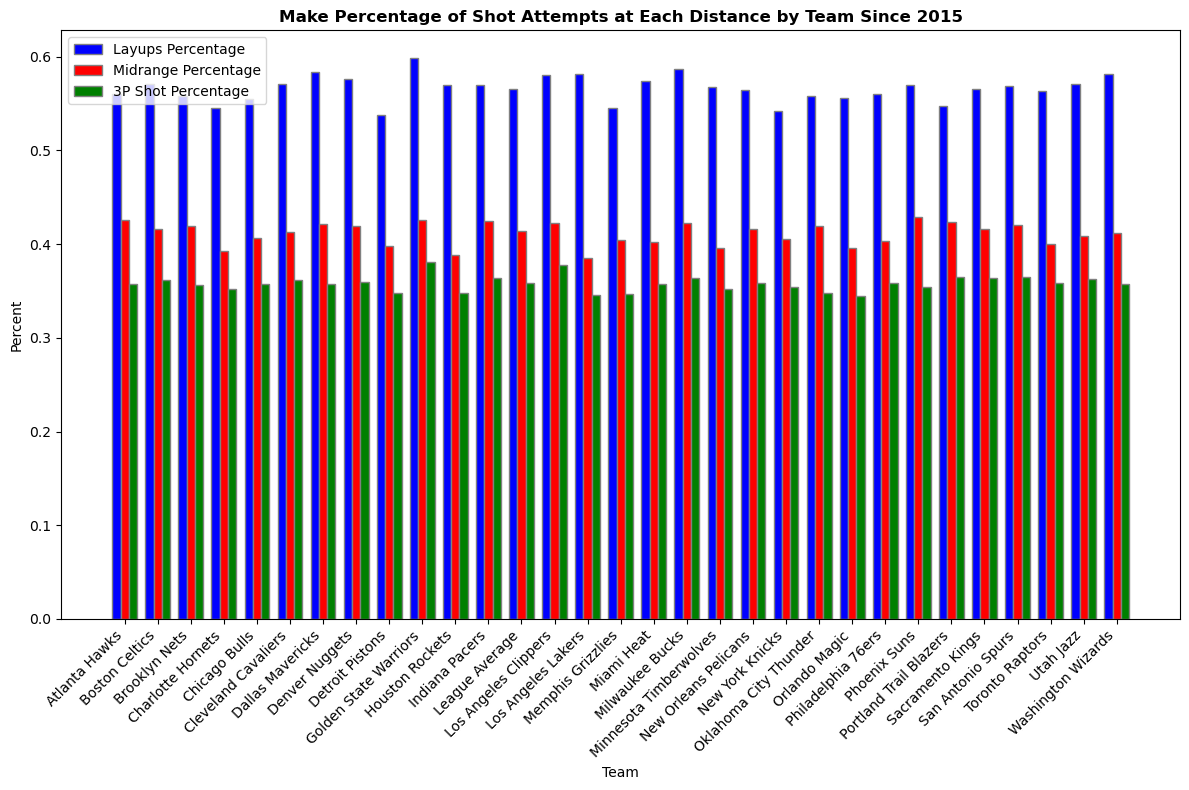

Make Percentage
Layups 
Highest Percentage: 0.5982542426891251
Lowest Percentage: 0.5374448763503346

Midrange 
Highest Percentage: 0.4294301848876965
Lowest Percentage: 0.38529320588987925

3P 
Highest Percentage: 0.38120000000000004
Lowest Percentage: 0.3447


In [16]:
plt.figure(figsize=(12, 8))


bar_width = 0.25


r1 = np.arange(len(RecentTeam_averages_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]


plt.bar(r1, RecentTeam_averages_df['Layups%'], color='b', width=bar_width, edgecolor='grey', label='Layups Percentage')
plt.bar(r2, RecentTeam_averages_df['Midrange%'], color='r', width=bar_width, edgecolor='grey', label='Midrange Percentage')
plt.bar(r3, RecentTeam_averages_df['3P%'], color='g', width=bar_width, edgecolor='grey', label='3P Shot Percentage')


plt.xlabel('Team')
plt.ylabel('Percent')
plt.title('Make Percentage of Shot Attempts at Each Distance by Team Since 2015', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(RecentTeam_averages_df))], RecentTeam_averages_df['Team'], rotation=45, ha='right')


plt.legend()


plt.tight_layout()
plt.show()
print("Make Percentage")
print(f'Layups \nHighest Percentage: {RecentTeam_averages_df['Layups%'].max()}\nLowest Percentage: {RecentTeam_averages_df['Layups%'].min()}\n')
print(f'Midrange \nHighest Percentage: {RecentTeam_averages_df['Midrange%'].max()}\nLowest Percentage: {RecentTeam_averages_df['Midrange%'].min()}\n')
print(f'3P \nHighest Percentage: {RecentTeam_averages_df['3P%'].max()}\nLowest Percentage: {RecentTeam_averages_df['3P%'].min()}')


# Shot types effects on Offense Task 4

Data was scaled to league average

In [17]:
teamsWithoutAverage_df = shooting_df[~shooting_df['Team'].str.contains('League', case=False, na=False)]
#teamsWithoutAverage_df
recentTeamsWithoutAverage_df = recent_df[~recent_df['Team'].str.contains('League', case=False, na=False)]

def scale_column(row, column_name, league_avg_df):
    
    x = league_avg_df.set_index('Year')[column_name]
    
    if 'League' in row['Team']:
        return row[column_name] 
    else:
        return row[column_name] / x[row['Year']]


columns_to_scale = ["0-3A", "3-10A", "10-16A", "16-3PA", "3PA", "ORtg", "PPG"]


for col in columns_to_scale:
    teamsWithoutAverage_df[f'{col}_scaled'] = teamsWithoutAverage_df.apply(scale_column, axis=1, column_name=col, league_avg_df=leagueAveragesScoringTypes_df)



C:\Users\scwvi\AppData\Local\Temp\ipykernel_22588\581000720.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamsWithoutAverage_df[f'{col}_scaled'] = teamsWithoutAverage_df.apply(scale_column, axis=1, column_name=col, league_avg_df=leagueAveragesScoringTypes_df)
C:\Users\scwvi\AppData\Local\Temp\ipykernel_22588\581000720.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamsWithoutAverage_df[f'{col}_scaled'] = teamsWithoutAverage_df.apply(scale_column, axis=1, column_name=col, league_avg_df=leagueA

Scatterplots comparing categories with Heatmap assigned to Year

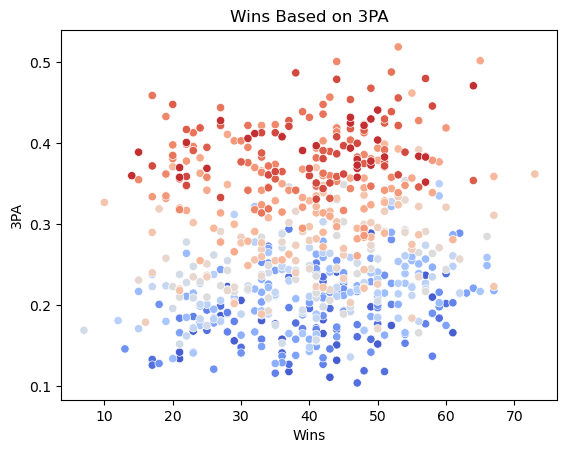

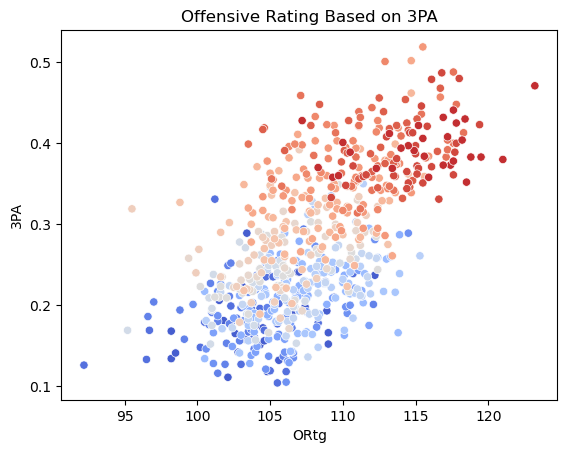

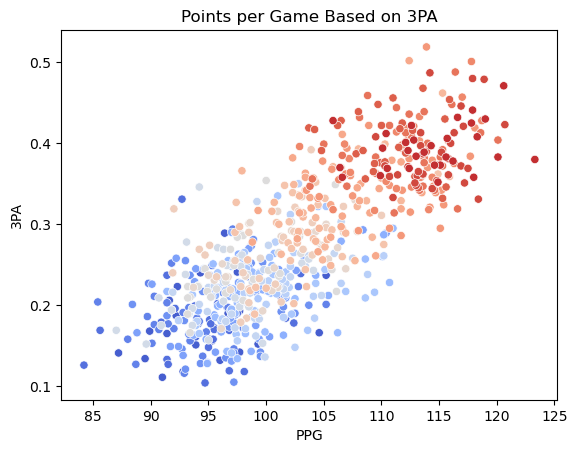

In [18]:
plot = sns.scatterplot(data=teamsWithoutAverage_df, x='Wins', y='3PA',hue="Year",palette='coolwarm',legend=None)
plt.title("Wins Based on 3PA")

plt.show()
plot = sns.scatterplot(data=teamsWithoutAverage_df,x='ORtg',y='3PA',hue="Year",palette='coolwarm',legend=None)
plt.title("Offensive Rating Based on 3PA")
plt.show()

plot = sns.scatterplot(data=teamsWithoutAverage_df,x='PPG',y='3PA',hue="Year",palette='coolwarm',legend=None)
plt.title("Points per Game Based on 3PA")
plt.show()


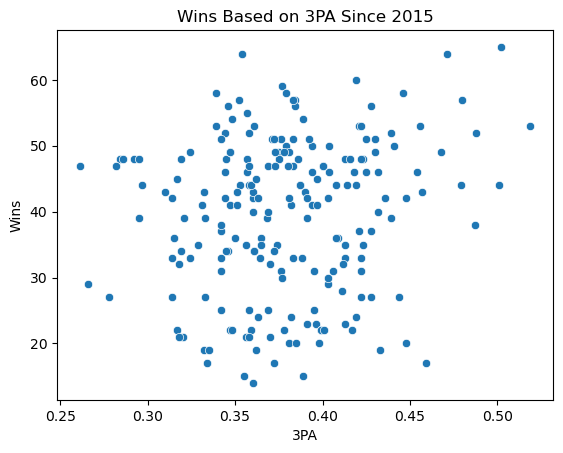

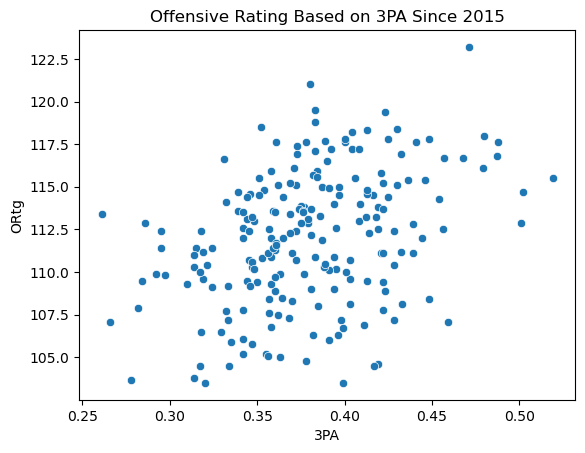

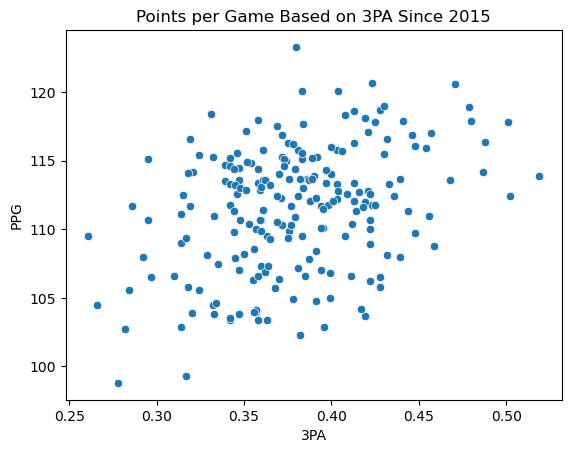

In [19]:
plot = sns.scatterplot(data=recentTeamsWithoutAverage_df,y='Wins',x='3PA')
plt.title("Wins Based on 3PA Since 2015")
plt.show()
plot = sns.scatterplot(data=recentTeamsWithoutAverage_df,y='ORtg',x='3PA')
plt.title("Offensive Rating Based on 3PA Since 2015")
plt.show()

plot = sns.scatterplot(data=recentTeamsWithoutAverage_df,y='PPG',x='3PA')
plt.title("Points per Game Based on 3PA Since 2015")
plt.show()

Regression of Shot distance effect on Wins and PPG, ORtg scaled to League Average

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


predictor_columns = ["0-3A", "3-10A", "10-16A", "16-3PA", "3PA"]
target_columns = ["Wins","ORtg", "PPG"]


teamsWithoutAverage_df.dropna(subset=predictor_columns + target_columns, inplace=True)

X = teamsWithoutAverage_df[predictor_columns]


model = LinearRegression()

n = 200 #Counter for amount of sample regressions
# Did because of the low sample size
for target_column in target_columns:
    
    r2_list = []
    coef_list = []
    intercept_list = []
    
    
    for _ in range(n):
        y = teamsWithoutAverage_df[target_column]
        
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        
        model.fit(X_train, y_train)
        
        
        y_pred = model.predict(X_test)
        
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        
        
        r2_list.append(r2)
        coef_list.append(model.coef_)
        intercept_list.append(model.intercept_)
    
    
    
    avg_r2 = np.mean(r2_list)
    avg_coef = np.mean(coef_list, axis=0)  
    avg_intercept = np.mean(intercept_list)
    
    
    print(f"Results for target: {target_column}")
    
    print(f"Average R^2 Score over 100 runs: {avg_r2}")
    print(f"Average Model Coefficients: {avg_coef}")
    print(f"Average Intercept: {avg_intercept}\n")

C:\Users\scwvi\AppData\Local\Temp\ipykernel_22588\1439839130.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamsWithoutAverage_df.dropna(subset=predictor_columns + target_columns, inplace=True)


Results for target: Wins
Average R^2 Score over 100 runs: 0.039687766949967285
Average Model Coefficients: [ -4.82614399 -71.37074985  57.48495516  14.20349098  44.23366983]
Average Intercept: 32.03716194056834

Results for target: ORtg
Average R^2 Score over 100 runs: 0.43804204056014273
Average Model Coefficients: [-349.54974155 -351.71093899 -335.91010679 -353.47901677 -315.88386421]
Average Intercept: 447.708858062933

Results for target: PPG
Average R^2 Score over 100 runs: 0.6746432566453315
Average Model Coefficients: [-401.52535641 -409.88241581 -404.08532599 -439.58729935 -359.37470673]
Average Intercept: 500.6897658567295



Regression of Shot distance effect on Wins, PPG, and ORtg Since 2015

In [ ]:



predictor_columns = ["0-3A", "3-10A", "10-16A", "16-3PA", "3PA"]
target_columns = ["Wins","ORtg", "PPG"]ds


recentTeamsWithoutAverage_df.dropna(subset=predictor_columns + target_columns, inplace=True)

X = recentTeamsWithoutAverage_df[predictor_columns]


model = LinearRegression()

n = 200 #Counter for amount of sample regressions
# Did because of the low sample size
for target_column in target_columns:
    
    r2_list = []
    coef_list = []
    intercept_list = []
    
    
    for _ in range(n):
        y = recentTeamsWithoutAverage_df[target_column]
        
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        
        model.fit(X_train, y_train)
        
        
        y_pred = model.predict(X_test)
        
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        
        
        r2_list.append(r2)
        coef_list.append(model.coef_)
        intercept_list.append(model.intercept_)
    
    
    
    avg_r2 = np.mean(r2_list)
    avg_coef = np.mean(coef_list, axis=0)  
    avg_intercept = np.mean(intercept_list)
    
    
    print(f"Results for target: {target_column}")
    
    print(f"Average R^2 Score over 100 runs: {avg_r2}")
    print(f"Average Model Coefficients: {avg_coef}")
    print(f"Average Intercept: {avg_intercept}\n")

C:\Users\scwvi\AppData\Local\Temp\ipykernel_22588\2231948567.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recentTeamsWithoutAverage_df.dropna(subset=predictor_columns + target_columns, inplace=True)


Results for target: Wins
Average R^2 Score over 100 runs: 0.046386178343834544
Average Model Coefficients: [-402.18537624 -444.1363154  -209.79283466 -394.53017076 -306.19932752]
Average Intercept: 393.5283915785435

Results for target: ORtg
Average R^2 Score over 100 runs: 0.2798265880324664
Average Model Coefficients: [-377.72742334 -364.58977729 -288.37031243 -399.78086948 -332.03847708]
Average Intercept: 462.9303872596931

Results for target: PPG
Average R^2 Score over 100 runs: 0.17377655745025183
Average Model Coefficients: [-280.87942362 -287.60440287 -211.79555362 -341.43315564 -254.43851485]
Average Intercept: 381.5948360282442



In [22]:
predictor_columns = ["3PA"]
target_columns = ["3P%"]


recentTeamsWithoutAverage_df.dropna(subset=predictor_columns + target_columns, inplace=True)

X = recentTeamsWithoutAverage_df[predictor_columns]


model = LinearRegression()

n = 200 #Counter for amount of sample regressions
# Did because of the low sample size
for target_column in target_columns:
    
    r2_list = []
    coef_list = []
    intercept_list = []
    
    
    for _ in range(n):
        y = recentTeamsWithoutAverage_df[target_column]
        
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        
        model.fit(X_train, y_train)
        
        
        y_pred = model.predict(X_test)
        
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        
        
        r2_list.append(r2)
        coef_list.append(model.coef_)
        intercept_list.append(model.intercept_)
    
    
    
    avg_r2 = np.mean(r2_list)
    avg_coef = np.mean(coef_list, axis=0)  
    avg_intercept = np.mean(intercept_list)
    
    
    print(f"Results for target: {target_column}")
    
    print(f"Average R^2 Score over 100 runs: {avg_r2}")
    print(f"Average Model Coefficients: {avg_coef}")
    print(f"Average Intercept: {avg_intercept}\n")

C:\Users\scwvi\AppData\Local\Temp\ipykernel_22588\1357875793.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recentTeamsWithoutAverage_df.dropna(subset=predictor_columns + target_columns, inplace=True)


Results for target: 3P%
Average R^2 Score over 100 runs: -0.03237285122359676
Average Model Coefficients: [0.03770426]
Average Intercept: 0.34571621895694643



# Team Classification Task 5

c:\Users\scwvi\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\scwvi\AppData\Local\Temp\ipykernel_22588\1756795728.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamsWithoutAverage_df['Cluster'] = kmeans.fit_predict(X)


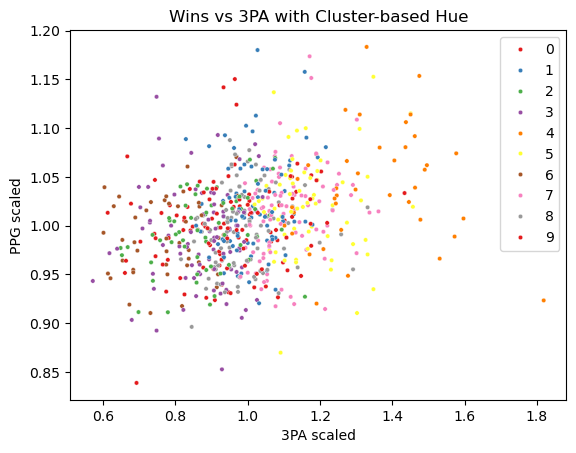

In [27]:
from sklearn.cluster import KMeans



scaled_columns = ["0-3A_scaled", "3-10A_scaled", "10-16A_scaled", "16-3PA_scaled","3PA_scaled", "ORtg_scaled", "PPG_scaled"]
#scaled_columns = ["0-3A", "3-10A", "10-16A", "16-3PA","3PA", "ORtg", "PPG"]
X = teamsWithoutAverage_df[scaled_columns]
kmeans = KMeans(n_clusters=10, random_state=42)

teamsWithoutAverage_df['Cluster'] = kmeans.fit_predict(X)
teamsWithoutAverage_df_sorted = teamsWithoutAverage_df.sort_values(by=['Cluster', 'Year'])



sns.scatterplot(data=teamsWithoutAverage_df, x='3PA_scaled', y='PPG_scaled', hue='Cluster', palette='Set1', s=10)
plt.legend(loc="upper right")


plt.title('Wins vs 3PA with Cluster-based Hue')
plt.xlabel('3PA scaled')
plt.ylabel('PPG scaled')
plt.show()

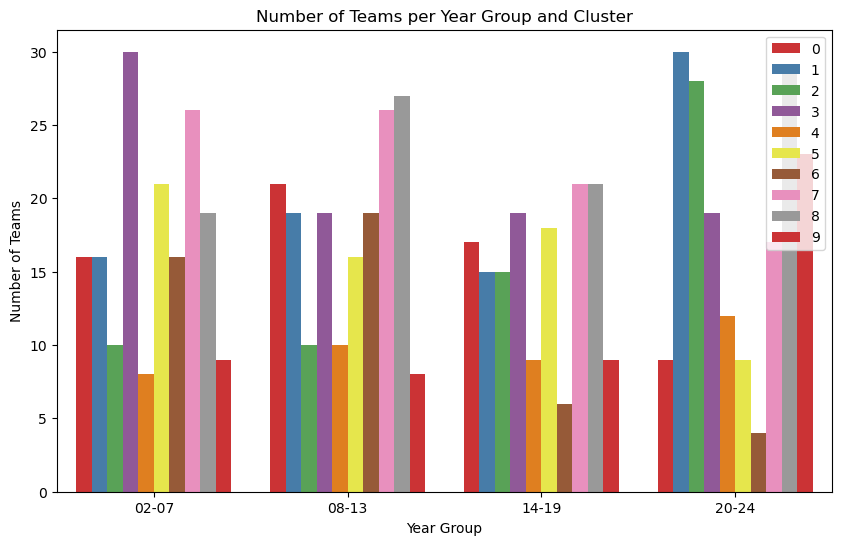

In [26]:
def getYearGroup(value):
   
    value_int = int(value)
    
    if value_int <= 7:
        return "02-07"
    elif 8 <= value_int < 14:
        return "08-13"
    elif 14 <= value_int < 19:
        return "14-19"
    else:
        return "20-24"


teamsWithoutAverage_df_sorted['Year_Group'] = teamsWithoutAverage_df_sorted['Year'].apply(getYearGroup)


cluster_year_counts = teamsWithoutAverage_df_sorted.groupby(['Cluster', 'Year_Group']).size().reset_index(name='Count')


plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_year_counts, x='Year_Group', y='Count', hue='Cluster', palette='Set1')

plt.legend(loc='upper right')
plt.title('Number of Teams per Year Group and Cluster')
plt.xlabel('Year Group')
plt.ylabel('Number of Teams')
plt.show()


In [25]:

teamsWithoutAverage_df_sorted[["Team","Cluster"]].to_csv("output.csv")